<a href="https://colab.research.google.com/github/nickprock/influencer/blob/master/notebook/socialAU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
import numpy as np
torch.cuda.is_available()

True

In [2]:
!pip install git+https://github.com/nickprock/influencer.git

  Cloning https://github.com/nickprock/influencer.git to /tmp/pip-req-build-fedlmqbv
  Running command git clone -q https://github.com/nickprock/influencer.git /tmp/pip-req-build-fedlmqbv


In [3]:
import influencer
influencer.__version__

'0.2.0'

In [4]:
from influencer.centrality import socialAU as npsAU
from influencer.torch_centrality import socialAU as torchsAU

In [5]:
import time

rifare esperimento con numpy e torch separati, torch senza trasformazione, con tensore direttamente

In [6]:
np_time = []
torch_time = []
axe = []
user = [5, 10, 100, 500, 1000]
item = [5, 10, 100, 500, 1000]



In [7]:
# RAM is full using numpy with 10^9 nodes, runtime crush
word = [5, 10, 100, 500]

for u in user:
  for i in item:
    for w in word:
      userNet = np.random.rand(u, u)
      userNet[userNet>0.5]=1
      userNet[userNet<=0.5]=0
      itemNet = np.random.rand(i, i)
      itemNet[itemNet>0.5]=1
      itemNet[itemNet<=0.5]=0
      wordNet = np.random.rand(w, w)
      wordNet[wordNet>0.5]=1
      wordNet[wordNet<=0.5]=0
      ten = np.random.rand(u,i,w)
      ten[ten>0.5]=1
      ten[ten<=0.5]=0
      start_time1 = time.time()
      _, _, _ = npsAU(userNet, itemNet, wordNet, ten)
      exe_time1 = time.time() - start_time1
      np_time.append(exe_time1)


In [8]:
word = [5, 10, 100, 500, 1000]

for u in user:
  for i in item:
    for w in word:
      userNet = torch.rand(u, u).float().to(0)
      userNet[userNet>0.5]=1
      userNet[userNet<=0.5]=0
      itemNet = torch.rand(i, i).float().to(0)
      itemNet[itemNet>0.5]=1
      itemNet[itemNet<=0.5]=0
      wordNet = torch.rand(w, w).float().to(0)
      wordNet[wordNet>0.5]=1
      wordNet[wordNet<=0.5]=0
      ten = torch.rand(u,i,w).float().to(0)
      ten[ten>0.5]=1
      ten[ten<=0.5]=0
      start_time2 = time.time()
      _, _, _ = torchsAU(userNet, itemNet, wordNet, ten)
      exe_time2 = time.time() - start_time2
      torch_time.append(exe_time2)
      axe.append(torch.numel(ten))

In [9]:
import matplotlib.pyplot as plt

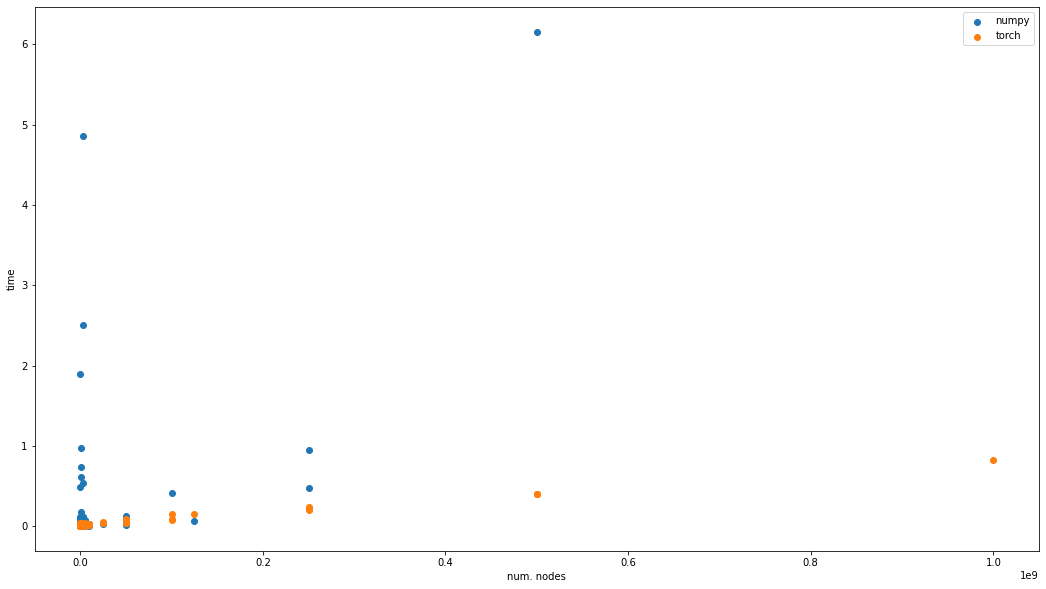

In [10]:
plt.figure(figsize=(18,10))
plt.scatter(axe[:-25], np_time)
plt.scatter(axe, torch_time)
plt.legend(["numpy", "torch"])
plt.xlabel("num. nodes")
plt.ylabel("time")
plt.show()